In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

import warnings
from datetime import datetime

warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\Titanic-Dataset.csv")
test_data = pd.read_csv("C:\\Users\\Pallavi\\Downloads\\Titanic-Dataset.csv")

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


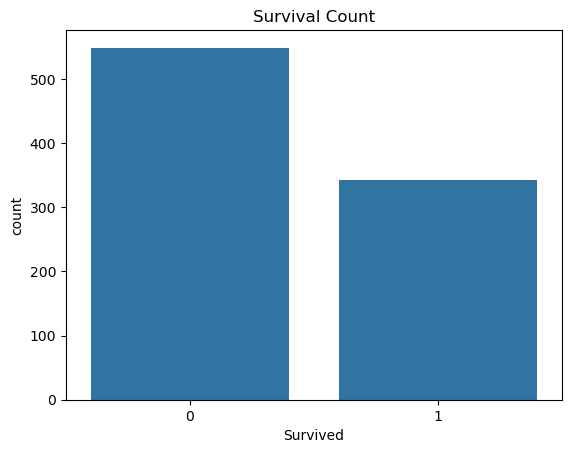

In [6]:
# Visualizing survival count
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

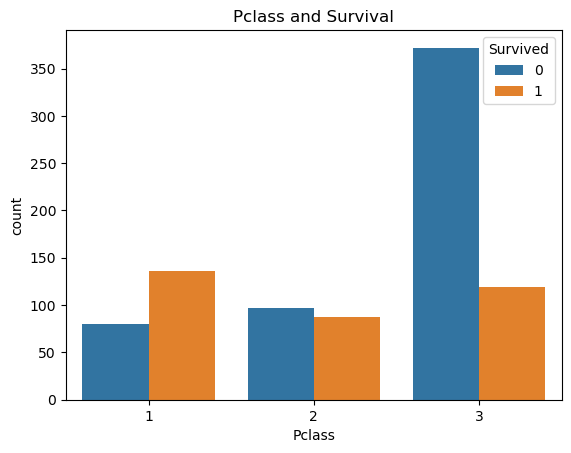

In [7]:
# Class distribution
sns.countplot(x='Pclass', data=train_data, hue='Survived')
plt.title('Pclass and Survival')
plt.show()

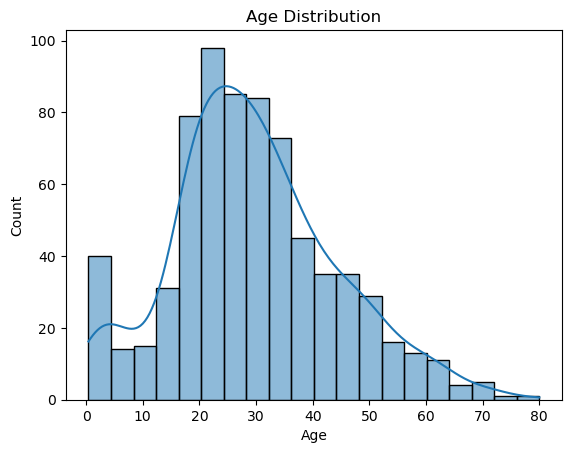

In [8]:
# Distribution of Age
sns.histplot(train_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

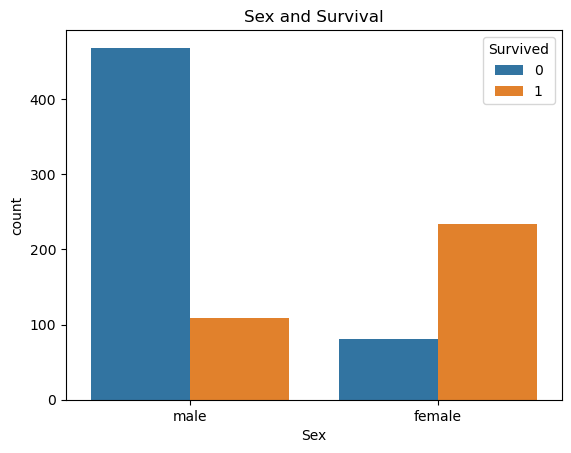

In [9]:
# Gender and survival
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Sex and Survival')
plt.show()

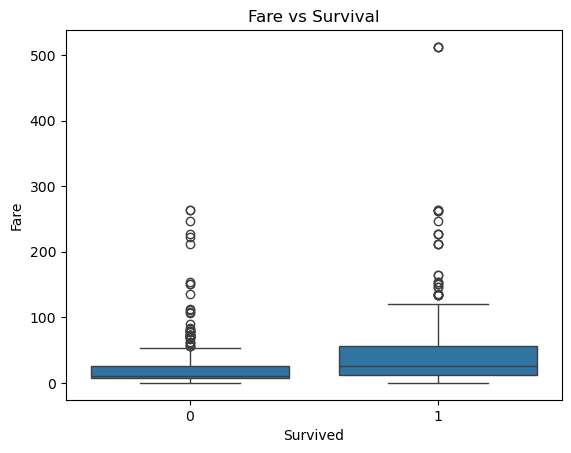

In [10]:
# Fare and survival
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Fare vs Survival')
plt.show()

In [11]:
# Missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Fill missing values in Age with the median grouped by Pclass and Sex
train_data['Age'] = train_data['Age'].fillna(
    train_data.groupby(['Pclass', 'Sex'])['Age'].transform('median')
)
test_data['Age'] = test_data['Age'].fillna(
    test_data.groupby(['Pclass', 'Sex'])['Age'].transform('median')
)

In [13]:
# Fill missing values in Embarked with the most frequent value
most_frequent_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_frequent_embarked)
test_data['Embarked'] = test_data['Embarked'].fillna(most_frequent_embarked)


In [14]:
# Fill missing values in Fare with the median
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [15]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [17]:
# Label encode Sex
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

In [18]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode Embarked
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid dummy variable trap
embarked_encoded_train = onehot_encoder.fit_transform(train_data[['Embarked']])
embarked_encoded_test = onehot_encoder.transform(test_data[['Embarked']])

In [19]:
# Add one-hot encoded columns back
embarked_columns = onehot_encoder.get_feature_names_out(['Embarked'])
train_data = train_data.join(pd.DataFrame(embarked_encoded_train, columns=embarked_columns, index=train_data.index))
test_data = test_data.join(pd.DataFrame(embarked_encoded_test, columns=embarked_columns, index=test_data.index))

In [20]:
# Drop original Embarked column
train_data = train_data.drop(columns=['Embarked'])
test_data = test_data.drop(columns=['Embarked'])

In [21]:
# Drop unnecessary columns
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [22]:
# Define numerical features
numerical_features = ['Age', 'Fare', 'FamilySize']

In [23]:
# Apply MinMaxScaler and StandardScaler
scaler = ColumnTransformer(transformers=[
    ('norm', MinMaxScaler(), numerical_features),   # Normalization
    ('std', StandardScaler(), numerical_features)   # Standardization
], remainder='passthrough')  # Keep other columns as is

In [24]:
# Separate features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [25]:
# Apply scaling
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_data)

In [26]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8324022346368715
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [29]:
test_predictions = model.predict(test_scaled)

In [30]:
# Display predictions
print("Sample Predictions on Test Data:")
print(test_predictions[:10])

Sample Predictions on Test Data:
[0 1 1 1 0 0 0 0 1 1]


In [31]:
# Display all predictions
print("All Predictions on Test Data:")
print(test_predictions)

All Predictions on Test Data:
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0

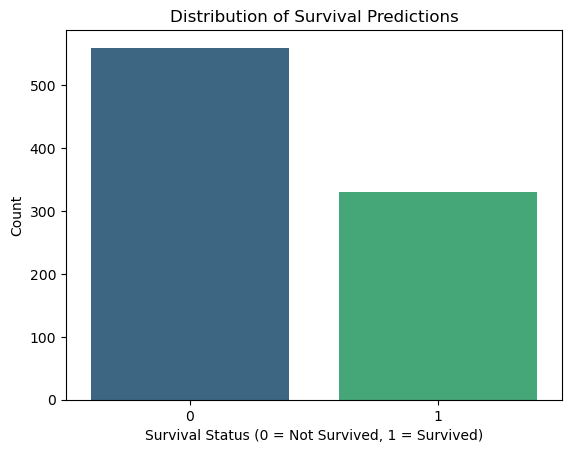

In [32]:
sns.countplot(x=test_predictions, palette="viridis")
plt.title("Distribution of Survival Predictions")
plt.xlabel("Survival Status (0 = Not Survived, 1 = Survived)")
plt.ylabel("Count")
plt.show()

In [33]:
# Create submission file
submission = pd.DataFrame({
    'PassengerId': pd.read_csv("C:/Users/Pallavi/Downloads/Titanic-Dataset.csv")['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)